In [1]:
import sys
sys.path.append("../../")
from pypadre.app import p_app

In [2]:
# Authenticates given user with password and sets token in the Config file
# Requirement: First create your user through interface
pypadre.authenticate("cfellicious", "test")

In [3]:
# Delete all local datasets. Then show all available datasets on local and server
list_of_datasets = pypadre.local_backend.datasets.list()
print("Datasets in local before deleting")
print(list_of_datasets)
for ds in list_of_datasets:
    pypadre.datasets.delete(ds)

print("Datasets in local")
print(pypadre.local_backend.datasets.list())

print("Datasets on server")
print(pypadre.remote_backend.datasets.list())

Datasets in local before deleting
[]
Datasets in local
[]
Datasets on server
[]


In [4]:
# Download a dataset from OpenML and upload it to the server
# For the following example we are downloading diabetes dataset from openMl and uploading it to the Server
# Some datasets in OpenML do not work and raise exceptions
name = "diabetes"
downloads = pypadre.datasets.search_downloads(name)
print("Datasets available on openMl for " + name)
print(downloads)
print("Saving OpenMl Datasets... ")
for externel_dataset in pypadre.datasets.download(downloads):
    pypadre.datasets.put(externel_dataset, upload=True)

Datasets available on openMl for diabetes
[{'did': 37, 'name': 'diabetes', 'format': 'ARFF', 'status': 'active', 'MajorityClassSize': 500, 'MaxNominalAttDistinctValues': 2, 'MinorityClassSize': 268, 'NumberOfClasses': 2, 'NumberOfFeatures': 9, 'NumberOfInstances': 768, 'NumberOfInstancesWithMissingValues': 0, 'NumberOfMissingValues': 0, 'NumberOfNumericFeatures': 8, 'NumberOfSymbolicFeatures': 1}]
Saving OpenMl Datasets... 
Uploading dataset diabetes, (768, 9), Multivariat


In [5]:
# Total available datasets in Padre and print their details
for ds in pypadre.datasets.list():
    pypadre.datasets.print_dataset_details(ds)

Metadata for dataset 1
	id=9f9b1f0e-378f-486e-9b5a-96fd0a9bac7a
	name=diabetes
	version=1
	description=**Author**: [Vincent Sigillito](vgs@aplcen.apl.jhu.edu)  

**Source**: [Obtained from UCI](https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes) 

**Please cite**: [UCI citation policy](https://archive.ics.uci.edu/ml/citation_policy.html)  

1. Title: Pima Indians Diabetes Database
 
 2. Sources:
    (a) Original owners: National Institute of Diabetes and Digestive and
                         Kidney Diseases
    (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                           Research Center, RMI Group Leader
                           Applied Physics Laboratory
                           The Johns Hopkins University
                           Johns Hopkins Road
                           Laurel, MD 20707
                           (301) 953-6231
    (c) Date received: 9 May 1990
 
 3. Past Usage:
     1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.

In [6]:
# Get dataset from server(Which is download from openMl in the Previous step) and use it later in the experiment 
did = "1"
print("Datasets %s on server" % did)
ds = pypadre.remote_backend.datasets.get(did)
print(ds)

Datasets 1 on server
1_diabetes: http://www.padre-lab.eu/onto/Multivariat, (768, 9), pandas


In [7]:
# Run experiment with dataset downloaded in the Previous steps from openMl
import uuid
import pprint
from padre.core import Experiment

def create_test_pipeline():
    from sklearn.pipeline import Pipeline
    from sklearn.svm import SVC
    from sklearn.decomposition import PCA
    # estimators = [('reduce_dim', PCA()), ('clf', SVC())]
    estimators = [('SVC', SVC(probability=True))]
    return Pipeline(estimators)

test_experiment_name = "Test Experiment SVM " + str(uuid.uuid4())[0:9] # Unique name for experiment
ex = Experiment(name=test_experiment_name,
                description="Testing Support Vector Machines via SKLearn Pipeline",
                dataset=ds,
                workflow=create_test_pipeline(), 
                keep_splits=True, strategy="random")

conf = ex.configuration()  # configuration, which has been automatically extracted from the pipeline
pprint.pprint(ex.hyperparameters())  # get and print hyperparameters
ex.execute()  # run the experiment and report

pypadre.metrics_evaluator.add_experiments([ex])

{'Step_0': {'algorithm': {'attributes': {'path': '.steps[0][1]'},
                          'value': 'c-oja pas vector classification'},
            'doc': {'attributes': {'path': '.steps[0][1].__doc__'},
                    'value': 'C-Support Vector Classification.\n'
                             '\n'
                             '    The implementation is based on libsvm. The '
                             'fit time complexity\n'
                             '    is more than quadratic with the number of '
                             'samples which makes it hard\n'
                             '    to scale to dataset with more than a couple '
                             'of 10000 samples.\n'
                             '\n'
                             '    The multiclass support is handled according '
                             'to a one-vs-one scheme.\n'
                             '\n'
                             '    For details on the precise mathematical '
            

INFO: 2019-03-14 16:24:07.820 Experiment<id:Test Experiment SVM 7b43774e->:	start: phase=experiment
INFO: 2019-03-14 16:24:09.682 	Run<id:1cb3a134-cb41-4d79-837e-b4b04b52edcd;name:Test Experiment SVM 7b43774e->:	start: phase=run
INFO: 2019-03-14 16:24:11.508 		Split<id:3f24e9c8-917e-470b-8061-3f4fa41db752;name:Test Experiment SVM 7b43774e->:	start: phase=split
INFO: 2019-03-14 16:24:12.799 		Split<id:3f24e9c8-917e-470b-8061-3f4fa41db752;name:Test Experiment SVM 7b43774e->:	stop: phase=split
INFO: 2019-03-14 16:24:12.802 	Run<id:1cb3a134-cb41-4d79-837e-b4b04b52edcd;name:Test Experiment SVM 7b43774e->:	stop: phase=run
INFO: 2019-03-14 16:24:12.803 Experiment<id:Test Experiment SVM 7b43774e->:	stop: phase=experiment


In [8]:
# Get experiment from server
experiments = pypadre.remote_backend.experiments.list_experiments(test_experiment_name)
experiment_instance = pypadre.remote_backend.experiments.get_experiment("1")
print(experiment_instance)

INFO: 2019-03-14 16:24:13.877 <padre.experimentcreator.ExperimentCreator object at 0x7ff7d5ec2b70>:	Test Experiment SVM 7b43774e- created successfully!
{'description': 'Testing Support Vector Machines via SKLearn Pipeline', 'dataset': ['diabetes'], 'workflow': ['SVC'], 'strategy': 'random', 'params': {'c-oja pas vector classification': {'C': [1.0], 'tol': [0.001], 'coef0': [0.0], 'gamma': ['auto'], 'degree': [3], 'kernel': ['rbf'], 'verbose': [False], 'shrinking': [True], 'probability': [True], 'class_weight': [None], 'random_state': [None], 'decision_function_shape': ['ovr']}}}


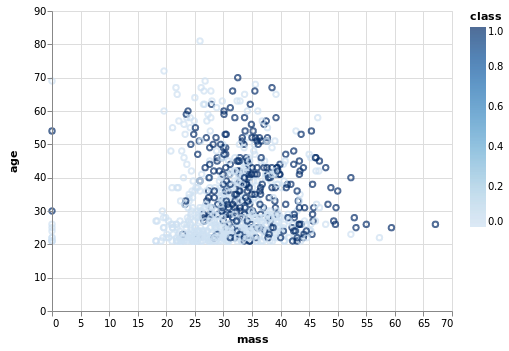

In [9]:
# Visualize dataset which was used above for experiment
import altair as alt
alt.renderers.enable('notebook')
dataset = pypadre.remote_backend.datasets.get(did).data
alt.Chart(dataset).mark_point().encode( # Settings for diabetes dataset
    x='mass',
    y='age',
    color='class'
)

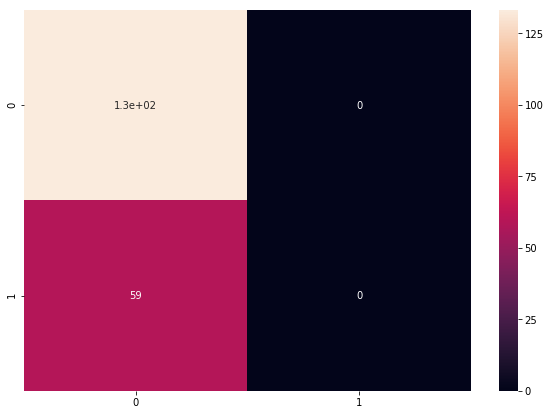

In [10]:
# Visualize the confusion matrix for the previous experiment
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

mt = ex.metrics[0][0]["confusion_matrix"]
df_cm = pd.DataFrame(mt)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.show()

In [11]:
# Import PadreApp from a package
from padre.app import pypadre
# All interactions with padre should be done via the app

In [ ]:
# Configuration of padreapp via a configuration file including backend, http, server authentication etc
"""
 from padre.app.padre_app import pypadre
 assert pypadre.offline
 pypadre.authenticate("test", "mgrani") # authentication sets the pypadre app into online mode
 pypadre.config.save()
 assert pypadre.offline == False
 # delete all datasets
 for ds in pypadre.datasets.list():
     pypadre.datasets.delete(ds)
 assert len([ds for ds in pypadre.datasets.list()])==0 # after deletion there should be no datasets
 # fetch downloads. This should include the datasets that are currently supported.
 downloads = pypadre.datasets.search_downloads("Iris", type="multivariate") # search for external datasets
 # user can manipulate downloads here
 downloaded = pypadre.datasets.download(downloads)
 for download in downloaded: 
    pypadre.datasets.put(ds)
 available = pypadre.datasets.list("Iris")
 assert downloads.equals(available) # the check might be more complex here, but both sets should be equal
 dataset = pypadre.datasets.get(available[0])
"""

In [12]:
# List all available datasets(Toy Datasets)
print(pypadre.datasets.list())

[<padre.core.datasets.Dataset object at 0x7ff7d30639e8>, <padre.core.datasets.Dataset object at 0x7ff7ccb6c6d8>]


In [13]:
# List all currently available local experiments
print(pypadre.experiments.list_experiments())

['Test Experiment SVM 021cc75d-', 'Test Experiment SVM 9617e580-', 'Decorated Experiment', 'Test Experiment SVM', 'Test Experiment SVM 45efad82-', 'Test Experiment SVM b797549a-', 'Test_Incorrect_Execute_Parameters', 'Test Experiment SVM c32e4875-', 'iPython Experiment1 ', 'KNN', 'SVC(Digits)', 'Regression using PCA and SVR(Digits)', 'Gaussian Process Regression', 'Grid search with Random Forest Classifier and PCA(Digits)', 'SVC(Iris)', 'IPython Experiment 3', 'Decision Tree(Iris)', 'Regression using PCA and SVR(Boston_House_Prices)', 'Decision Tree(Digits)', 'Test Experiment SVM bed4e8ac-', 'PLS Regression(Boston_House_Prices)', 'Grid search with Random Forest Classifier and PCA(Iris)', 'Torch', 'Linear SVR', 'Test Experiment SVM 7b43774e-', 'Random Forest Classifier with PCA', 'Experiment using bagging classifier', 'Test Experiment SVM 4af9c9d7-', 'Test Experiment SVM 1da6639c-', 'PLS Regression(Diabetes)', 'Test_Incorrect_Estimator', 'KNN Regressor', 'Test Experiment SVM a367ba28-',

In [14]:
# Create a simple experiment via experiment creator utilizing a dataset displayed. Run it with multiple parameters
pypadre.experiment_creator.clear_experiments()
workflow = pypadre.experiment_creator.create_test_pipeline(['isomap embedding'])
pypadre.experiment_creator.create(name='iPython Experiment1 ', 
                                  description='Simple iPython notebook experiment',
                                  workflow=workflow, 
                                  dataset_list=['Digits'])
pypadre.experiment_creator.execute()

# Aimed at new users for running already created experiments or running from JSON files

INFO: 2019-03-14 16:24:30.065 <padre.experimentcreator.ExperimentCreator object at 0x7ff7d6139f28>:	iPython Experiment1  created successfully!
{'Step_0': {'algorithm': {'attributes': {'path': '.steps[0][1]'},
                          'value': 'isomap embedding'},
            'doc': {'attributes': {'path': '.steps[0][1].__doc__'},
                    'value': 'Isomap Embedding\n'
                             '\n'
                             '    Non-linear dimensionality reduction through '
                             'Isometric Mapping\n'
                             '\n'
                             '    Read more in the :ref:`User Guide '
                             '<isomap>`.\n'
                             '\n'
                             '    Parameters\n'
                             '    ----------\n'
                             '    n_neighbors : integer\n'
                             '        number of neighbors to consider for each '
                             'poin

In [15]:
# Using decorators to run experiments
from padre.ds_import import load_sklearn_toys
from padre import *
from padre.app import pypadre
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

@Workflow(exp_name="Decorated Experiment",
          description="Test experiment with decorators and SVC")
def create_test_pipeline():
    estimators = [('SVC', SVC(probability=True))]
    return Pipeline(estimators)


@Dataset(exp_name="Decorated Experiment")
def get_dataset():
    ds = [i for i in load_sklearn_toys()][2]
    return ds



In [16]:
ex = pypadre.experiments.run(decorated=True)
ex = run("Decorated Experiment")  # run the experiment and report
# Aimed at engineers and scientists for quick prototyping and trying out features

creating the workflow
INFO: 2019-03-14 16:24:35.940 Experiment<id:Decorated Experiment>:	start: phase=experiment
INFO: 2019-03-14 16:24:36.233 	Run<id:702334d1-3781-4ee4-b136-a06c4c16d1d0;name:Decorated Experiment>:	start: phase=run
INFO: 2019-03-14 16:24:36.377 		Split<id:fe8ef67e-56d5-419d-b918-c4b73c1c3acf;name:Decorated Experiment>:	start: phase=split
INFO: 2019-03-14 16:24:37.436 		Split<id:fe8ef67e-56d5-419d-b918-c4b73c1c3acf;name:Decorated Experiment>:	stop: phase=split
INFO: 2019-03-14 16:24:37.467 	Run<id:702334d1-3781-4ee4-b136-a06c4c16d1d0;name:Decorated Experiment>:	stop: phase=run
INFO: 2019-03-14 16:24:37.483 Experiment<id:Decorated Experiment>:	stop: phase=experiment
creating the workflow
INFO: 2019-03-14 16:24:37.912 Experiment<id:Decorated Experiment>:	start: phase=experiment
INFO: 2019-03-14 16:24:38.228 	Run<id:59a5c707-6503-453e-b53a-067af7b0a377;name:Decorated Experiment>:	start: phase=run
INFO: 2019-03-14 16:24:38.383 		Split<id:37c51fda-8131-40b3-9c66-238aac0db6c

In [17]:
# Creating and running experiments via pure code (example.py)
def create_test_pipeline():
    from sklearn.pipeline import Pipeline
    from sklearn.svm import SVC
    from sklearn.decomposition import PCA
    # estimators = [('PCA', PCA()), ('clf', SVC())]
    estimators = [('SVC', SVC(probability=True))]
    return Pipeline(estimators)



In [18]:
from padre.ds_import import load_sklearn_toys
from padre.core import Experiment
from padre.base import PadreLogger
from padre.eventhandler import add_logger

logger = PadreLogger()
logger.backend = pypadre.repository
add_logger(logger=logger)
ds = [i for i in load_sklearn_toys()][2]
ex = Experiment(name="Test Experiment SVM",
                    description="Testing Support Vector Machines via SKLearn Pipeline",
                    dataset=ds,
                    workflow=create_test_pipeline(), keep_splits=True, strategy="random")
ex.execute()

INFO: 2019-03-14 16:24:55.163 Experiment<id:Test Experiment SVM>:	start: phase=experiment
INFO: 2019-03-14 16:24:55.539 Experiment<id:Test Experiment SVM>:	start: phase=experiment
INFO: 2019-03-14 16:24:55.884 	Run<id:9726c66f-05d7-4b7f-9283-1dea7ae17e07;name:Test Experiment SVM>:	start: phase=run
INFO: 2019-03-14 16:24:56.182 	Run<id:9726c66f-05d7-4b7f-9283-1dea7ae17e07;name:Test Experiment SVM>:	start: phase=run
INFO: 2019-03-14 16:24:56.347 		Split<id:f4191096-8a98-4987-97cc-2d684747c604;name:Test Experiment SVM>:	start: phase=split
INFO: 2019-03-14 16:24:56.498 		Split<id:f4191096-8a98-4987-97cc-2d684747c604;name:Test Experiment SVM>:	start: phase=split
INFO: 2019-03-14 16:24:57.477 		Split<id:f4191096-8a98-4987-97cc-2d684747c604;name:Test Experiment SVM>:	stop: phase=split
INFO: 2019-03-14 16:24:58.118 		Split<id:f4191096-8a98-4987-97cc-2d684747c604;name:Test Experiment SVM>:	stop: phase=split
INFO: 2019-03-14 16:24:58.150 	Run<id:9726c66f-05d7-4b7f-9283-1dea7ae17e07;name:Test Exp

In [19]:
# The PyTorch wrapper supports the use of User Defined Callbacks 
from padre.core.wrappers.wrapper_pytorch import WrapperPytorch, CallBack
class TestCallbacks(CallBack):
    def on_compute_loss(self, loss):
        print('Function on compute loss. Loss = {loss}'.format(loss=loss))

    def on_epoch_end(self, obj):
        print('Epoch ended')

    def on_epoch_start(self, obj):
        print('Epoch started')

    def on_iteration_start(self, obj):
        print('Iteration started')

    def on_iteration_end(self, obj):
        print('Iteration ended')

In [25]:
# Running an experiment with a custom wrapper
from sklearn.pipeline import Pipeline
import os

print(os.getcwd())
# Define the parameters
params = dict()

import json
with open('../proof_of_concept/Pytorch/classification.json') as json_data:
    params = json.load(json_data)

obj = WrapperPytorch(params=params)
obj.set_callbacks([TestCallbacks()])
estimators = [('pytorch', obj)]
workflow = Pipeline(estimators)
ds = [i for i in load_sklearn_toys()][4]

ex = Experiment(name="Torch",
                description="Testing Torch via SKLearn Pipeline",
                dataset=ds,
                workflow=workflow)
ex.execute()

/home/christofer/PycharmProjects/PyPaDRe/tests/examples
Epoch started
Epoch started
Epoch started
Iteration started
Iteration started
Iteration started
Function on compute loss. Loss = 0.23088191347808237
Function on compute loss. Loss = 0.23088191347808237
Function on compute loss. Loss = 0.23088191347808237
1 0.23088191347808237
Iteration ended
Iteration ended
Iteration ended
Iteration started
Iteration started
Iteration started
Function on compute loss. Loss = 0.20520843390277194
Function on compute loss. Loss = 0.20520843390277194
Function on compute loss. Loss = 0.20520843390277194
2 0.20520843390277194
Iteration ended
Iteration ended
Iteration ended
Iteration started
Iteration started
Iteration started
Function on compute loss. Loss = 0.25276096161270867
Function on compute loss. Loss = 0.25276096161270867
Function on compute loss. Loss = 0.25276096161270867
3 0.25276096161270867
Iteration ended
Iteration ended
Iteration ended
Iteration started
Iteration started
Iteration started

Function on compute loss. Loss = 0.20790900707194473
Function on compute loss. Loss = 0.20790900707194473
Function on compute loss. Loss = 0.20790900707194473
85 0.20790900707194473
Iteration ended
Iteration ended
Iteration ended
Iteration started
Iteration started
Iteration started
Function on compute loss. Loss = 0.2526666607052099
Function on compute loss. Loss = 0.2526666607052099
Function on compute loss. Loss = 0.2526666607052099
86 0.2526666607052099
Iteration ended
Iteration ended
Iteration ended
Iteration started
Iteration started
Iteration started
Function on compute loss. Loss = 0.23232069352115173
Function on compute loss. Loss = 0.23232069352115173
Function on compute loss. Loss = 0.23232069352115173
87 0.23232069352115173
Iteration ended
Iteration ended
Iteration ended
Iteration started
Iteration started
Iteration started
Function on compute loss. Loss = 0.22017709531959082
Function on compute loss. Loss = 0.22017709531959082
Function on compute loss. Loss = 0.22017709531

/home/christofer/PycharmProjects/test_folder/venv/lib/python3.6/site-packages/torch/nn/modules/container.py:91: UserWarning: Implicit dimension choice for softmin has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [22]:
# Compare the metrics between experiments and also between runs(Displaying pandas dataframe)
from padre.experimentexecutor import ExperimentExecutor
# Create an experiment with multiple runs
params_pca = {'num_components': [2, 3, 4, 5, 6]}
params_svr = {'C': [0.5, 1.0, 1.5],
              'poly_degree': [1, 2, 3]}
params_dict = {'SVR': params_svr, 'pca': params_pca}
workflow = pypadre.experiment_creator.create_test_pipeline(['pca', 'SVR'])
params_dict = pypadre.experiment_creator.convert_alternate_estimator_names(params_dict)
pypadre.experiment_creator.clear_experiments('IPython Experiment 3')
pypadre.experiment_creator.create(name='IPython Experiment 3',
                                  description='Experiment to test the comparison of metrics',
                                  dataset_list=['Boston_House_Prices'],
                                  workflow=workflow,
                                  params=params_dict
                                 )
experiments_executor = ExperimentExecutor(experiments=pypadre.experiment_creator.createExperimentList())
experiments_executor.execute(local_run=True, threads=1)
#from padre.metrics import CompareMetrics
#metrics = CompareMetrics(experiments_list=experiments_executor.experiments)
#print(metrics.show_metrics())
pypadre.metrics_evaluator.add_experiments(experiments_executor.experiments)
print(pypadre.metrics_evaluator.show_metrics())

Sequential Execution
{'Step_0': {'algorithm': {'attributes': {'path': '.steps[0][1]'},
                          'value': 'isomap embedding'},
            'doc': {'attributes': {'path': '.steps[0][1].__doc__'},
                    'value': 'Isomap Embedding\n'
                             '\n'
                             '    Non-linear dimensionality reduction through '
                             'Isometric Mapping\n'
                             '\n'
                             '    Read more in the :ref:`User Guide '
                             '<isomap>`.\n'
                             '\n'
                             '    Parameters\n'
                             '    ----------\n'
                             '    n_neighbors : integer\n'
                             '        number of neighbors to consider for each '
                             'point.\n'
                             '\n'
                             '    n_components : integer\n'
                      

                                     run  \
0   1cb3a134-cb41-4d79-837e-b4b04b52edcd   
1   a22d0e90-1e8b-4950-8e0e-3ff832fcc69c   
2   7b0f8cb2-f97f-4a7b-a3c3-4f162abe5ecb   
3   80b4ca92-0735-4c30-aa34-327780edf989   
4   87c722a2-a2f1-429e-9547-0026221dd828   
5   4df134e2-b1d1-413d-bbf5-9d25057c00a0   
6   57c34920-6d9e-425d-bee7-40fdcd41d827   
7   42bbfc90-5e5c-413e-bf13-2cc10035e772   
8   39d1226e-e3f8-4ce5-af66-93aa3499c7d6   
9   bc3c76ce-2a3a-4f50-b3da-eaf10d44fca2   
10  c14ca213-577c-427a-9e98-86c247dc3825   
11  afc99a0f-0440-4726-8e51-e09688cd40eb   
12  4d2dab17-22df-4679-9cf5-21257b600437   
13  8a11b536-6fa0-40da-8427-782fbab1b618   
14  d09f82fc-42e4-4866-a26e-c400d3143beb   
15  09def742-6f19-4124-b143-87968128b652   
16  0cf12480-d6ba-4645-985f-c9ab171729ff   
17  13fa5e2c-f1bc-4bfd-86ca-d08bd7ebd0bf   
18  5e828639-03f2-474f-87d2-0b303691a04d   
19  eb211c46-b02d-403b-baab-0b98e8e5d252   
20  8059956c-5ba5-4276-b047-5805f84f6424   
21  d70c5edd-6fdc-4ee5-b9be-ebee

In [23]:
# Analyze metrics where the runs have specific values for a component
pypadre.metrics_evaluator.analyze_runs(
    ['principal component analysis.num_components.4', 'principal component analysis.num_components.5'])
df = pypadre.metrics_evaluator.display_results()
print(df)

                                     run  \
0   bc3c76ce-2a3a-4f50-b3da-eaf10d44fca2   
1   9436c3dc-ea10-4a52-a683-d11195c408bc   
2   eb211c46-b02d-403b-baab-0b98e8e5d252   
3   acf6c447-dc45-43c0-853c-a9c60975dd48   
4   43180e35-a30e-4db2-b31e-12d378c4d6c2   
5   02d4c754-0a5a-40b6-9aa5-63c67569022e   
6   8b0b41c3-4625-44d1-b1d3-5986c3fe722b   
7   8a11b536-6fa0-40da-8427-782fbab1b618   
8   5c3ec8d2-c3c8-4aa8-a03d-d923efedb5a9   
9   39d1226e-e3f8-4ce5-af66-93aa3499c7d6   
10  d09f82fc-42e4-4866-a26e-c400d3143beb   
11  58cf2d70-347b-4ee0-8394-5b8b1543e08f   
12  5e828639-03f2-474f-87d2-0b303691a04d   
13  d95c53d7-a37b-4062-aa00-d2078ab98e7a   
14  87c722a2-a2f1-429e-9547-0026221dd828   
15  80b4ca92-0735-4c30-aa34-327780edf989   
16  e000f4cb-9ec7-47bb-97ae-9243689b8df5   
17  80f514b1-e63f-497d-8525-53349505b390   

                                   split                      dataset  \
0   92b0a80a-e5de-463e-b800-0dfbf5f7127a  Boston House Prices dataset   
1   ba06b963-7623

In [24]:
# Display only the metric specified by the user
pypadre.metrics_evaluator.analyze_runs(['principal component analysis.num_components.4'], ['mean_error'])
df = pypadre.metrics_evaluator.display_results()
print(df)

                                    run                                 split  \
0  9436c3dc-ea10-4a52-a683-d11195c408bc  ba06b963-7623-48cd-b0a3-c299d631efa1   
1  43180e35-a30e-4db2-b31e-12d378c4d6c2  b3706e82-0ae7-46b0-98a1-c556898eda30   
2  8b0b41c3-4625-44d1-b1d3-5986c3fe722b  372f2a69-3b42-4876-b647-b12130cb86d8   
3  8a11b536-6fa0-40da-8427-782fbab1b618  6a464916-a459-472c-9594-c1f57de5c68a   
4  5c3ec8d2-c3c8-4aa8-a03d-d923efedb5a9  be2f4393-865d-4df2-a5b6-b62142e74dc3   
5  39d1226e-e3f8-4ce5-af66-93aa3499c7d6  fa9adfc6-b05b-4bfe-8f87-35ee5ff7dd84   
6  5e828639-03f2-474f-87d2-0b303691a04d  b7e1269b-405a-4ad4-bfbd-8d8db84a2db3   
7  80b4ca92-0735-4c30-aa34-327780edf989  c6a5eba4-32db-4596-ac08-ce9687de83ab   
8  80f514b1-e63f-497d-8525-53349505b390  a6a084a5-1c8b-4fa7-b254-7028a0e0cd81   

                       dataset  \
0  Boston House Prices dataset   
1  Boston House Prices dataset   
2  Boston House Prices dataset   
3  Boston House Prices dataset   
4  Boston House Pri

In [ ]:
# Upload/Sync experiments on demand
# Not Implemented. Experiments can only be uploaded during the execution of the experiment

In [ ]:
# Look at the experiment via SPA and check the results and visualize them(if possible)

In [ ]:
# Download an experiment from the server and run it.(via the experiment.JSON file) Example for reproducibility
# Downloading experiment from server is done

In [ ]:
# Keep track of random seeds used in the experiment
# Not yet implemented

In [ ]:
# Running an experiment on the server cluster

In [ ]:
# Tracking the progress of experiments including hyperparameter search
# Code to be included in the backend for logging the porogress